# lightcurve


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
/bin/rm -rf param/
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
download_chandra_obsid 953,461 evt2,dtf
mv -f 953/primary/*evt2.fits.gz .
mv -f 461/primary/*fits.gz .
rmdir -p 953/primary
/bin/rm -rf 461
gunzip -f *fits.gz
/bin/ls


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        6 Mb  ####################          < 1 s  37655.3 kb/s


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       24 Mb  ####################          < 1 s  46230.7 kb/s
  dtf      fits      232 Kb  ####################          < 1 s  9671.6 kb/s
  dtf      fits        4 Kb  ####################          < 1 s  289.6 kb/s

      Total download size for ObsId 461 = 24 Mb
      Total download time for ObsId 461 = < 1 s

acisf00953N005_evt2.fits  chips_03.png	hrcf00461N005_evt2.fits
bkg.reg			  chips_04.png	hrcf00461_001N004_dtf1.fits
c1.py			  curve_1.fits	lightcurve.ipynb
c2.py			  curve_2.fits	lightcurve.sh
c3.py			  ds9_01.png	param
c4.py			  ds9_dax.kjg	src1.reg
chips_01.png		  hrc_lc.

## ACIS


### Regions


In [3]:
cat << EOM > src1.reg
# Region file format: CIAO version 1.0
circle(4011.0,4026.1,8)
EOM

In [4]:
cat << EOM > src2.reg
# Region file format: CIAO version 1.0
circle(4034.9,4023.6,8)
EOM

In [5]:
cat << EOM > bkg.reg
# Region file format: CIAO version 1.0
circle(3875.5,3972,54.5)
EOM

[1] 8780
[1]+  Done                    ds9 acisf00953N005_evt2.fits -scale log -region src1.reg -region src2.reg -region bkg.reg -saveimage png ds9_01.png


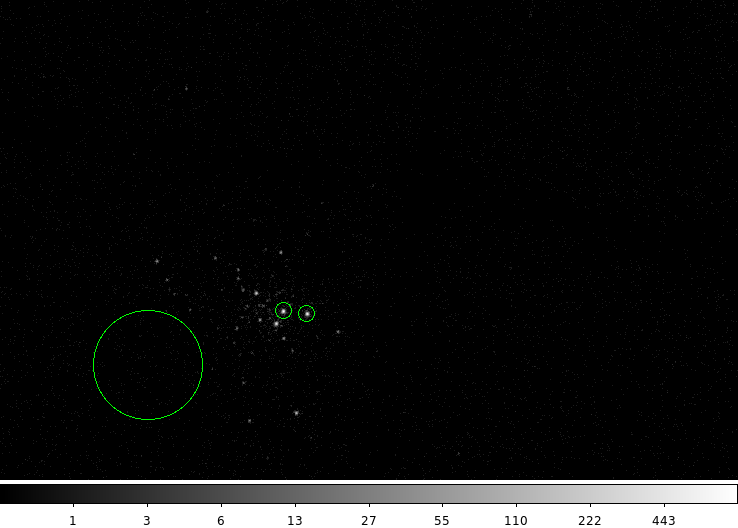

In [6]:
ds9 acisf00953N005_evt2.fits -scale log \
  -region src1.reg -region src2.reg -region bkg.reg \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

### Determine chips

In [7]:
dmstat "acisf00953N005_evt2.fits[sky=region(src1.reg)][cols ccd_id]"

ccd_id
    min:	3 	      @:	1 
    max:	3 	      @:	1 
   mean:	3 
  sigma:	0 
    sum:	7296 
   good:	2432 
   null:	0 



In [8]:
dmstat "acisf00953N005_evt2.fits[sky=region(src2.reg)][cols ccd_id]"

ccd_id
    min:	3 	      @:	1 
    max:	3 	      @:	1 
   mean:	3 
  sigma:	0 
    sum:	5850 
   good:	1950 
   null:	0 



In [9]:
dmstat "acisf00953N005_evt2.fits[sky=region(bkg.reg)][cols ccd_id]"

ccd_id
    min:	3 	      @:	1 
    max:	3 	      @:	1 
   mean:	3 
  sigma:	0 
    sum:	687 
   good:	229 
   null:	0 



### background subtracted lightcurve

In [10]:
pset dmextract infile="acisf00953N005_evt2.fits[ccd_id=3,sky=region(src2.reg)][bin time=::2000]"
pset dmextract outfile=src2_sub_lc.fits
pset dmextract bkg="acisf00953N005_evt2.fits[ccd_id=3,sky=region(bkg.reg)]"
pset dmextract opt=ltc1
dmextract mode=h clob+

In [11]:
dmlist src2_sub_lc.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block LIGHTCURVE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   TIME_BIN             channel      Int4           1:17                 S/C TT corresponding to mid-exposure
   2   TIME_MIN             s            Real8          69583184.1139039993: 69616983.4901389927 Minimum Value in Bin
   3   TIME                 s            Real8          69583184.1139039993: 69616983.4901389927 S/C TT corresponding to mid-exposure
   4   TIME_MAX             s            Real8          69583184.1139039993: 69616983.4901389927 Maximum Value in Bin
   5   COUNTS               count        Int4           -                    Counts
   6   STAT_ERR             count        Real8          0:+Inf               Statistical error
   7   AREA                 pixel**2     Real8          -Inf:+Inf        

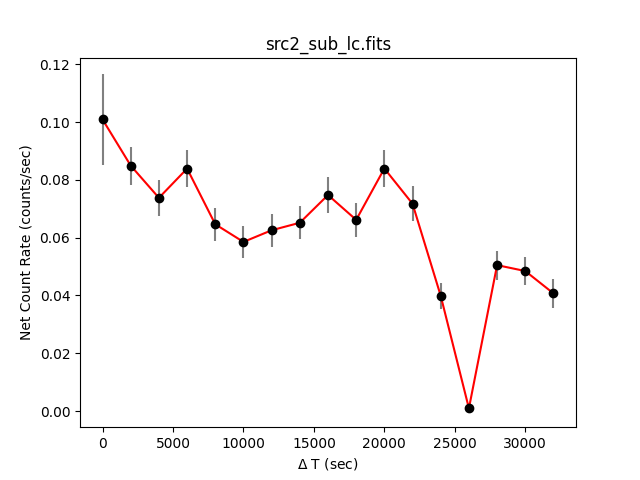

In [12]:
cat << EOM > c1.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("src2_sub_lc.fits")
dt = tab.get_column("dt").values
rate = tab.get_column("net_rate").values
erate = tab.get_column("err_rate").values

plt.errorbar(dt, rate, yerr=erate, marker="o", color="red", mfc="black",mec="black", ecolor="grey")
plt.xlabel("$\Delta$ T (sec)")
plt.ylabel("Net Count Rate (counts/sec)")
plt.title("src2_sub_lc.fits")
plt.savefig("chips_01.png")
EOM

python c1.py

display < chips_01.png

In [13]:
dmlist "src2_sub_lc.fits[cols time,dt,count_rate]" data

 
--------------------------------------------------------------------------------
Data for Table Block LIGHTCURVE
--------------------------------------------------------------------------------
 
ROW    TIME                 DT                   COUNT_RATE
 
     1  69584184.1139039993                    0     0.10108994807374
     2  69586184.1139039993               2000.0           0.08507730
     3  69588184.1139039993               4000.0         0.0739362250
     4  69590184.1139039993               6000.0         0.0840644750
     5  69592184.1139039993               8000.0           0.06482080
     6  69594184.1139039993              10000.0          0.058743850
     7  69596184.1139039993              12000.0          0.062795150
     8  69598184.1139039993              14000.0        0.06532721250
     9  69600184.1139039993              16000.0          0.074949050
    10  69602184.1139039993              18000.0        0.06634003750
    11  69604184.1139039993             

### Check other src for variability

In [14]:
punlearn dmextract
dmextract outfile="curve_1.fits" opt="ltc1" clob+\
      infile="acisf00953N005_evt2.fits[ccd_id=3,sky=region(src1.reg)][bin time=::2000]"
      

In [15]:
dmextract outfile="curve_2.fits" opt="ltc1" clob+\
      infile="acisf00953N005_evt2.fits[ccd_id=3,sky=region(src2.reg)][bin time=::2000]"

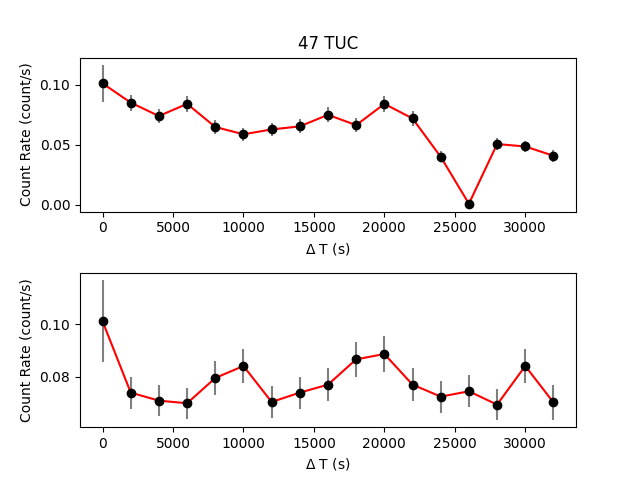

In [16]:
cat << EOM > c2.py
from pycrates import read_file
import matplotlib.pylab as plt

plt.subplots(2,1,sharex="col")
plt.subplots_adjust(hspace=0.4)
plt.subplot(2,1,2)

tab = read_file("curve_1.fits")
dt = tab.get_column("dt")
rate = tab.get_column("count_rate")
erate = tab.get_column("count_rate_err")
plt.errorbar(dt.values, rate.values, yerr=erate.values, 
    marker="o", color="red", mfc="black",mec="black", ecolor="grey")
plt.xlabel(r"$\Delta$ T (s)")
plt.ylabel("Count Rate (count/s)")

plt.subplot(2,1,1)
tab = read_file("curve_2.fits")
dt = tab.get_column("dt")
rate = tab.get_column("count_rate")
erate = tab.get_column("count_rate_err")
plt.errorbar(dt.values, rate.values, yerr=erate.values, 
    marker="o", color="red", mfc="black",mec="black", ecolor="grey")
plt.xlabel(r"$\Delta$ T (s)")
plt.ylabel("Count Rate (count/s)")
plt.title("47 TUC")

plt.savefig("chips_02.png")
EOM

python c2.py

display < chips_02.png


In [17]:
dmlist "curve_1.fits[dt=20000:30000][cols time,count_rate]" data

 
--------------------------------------------------------------------------------
Data for Table Block LIGHTCURVE
--------------------------------------------------------------------------------
 
ROW    TIME                 COUNT_RATE
 
     1  69604184.1139039993        0.08862218750
     2  69606184.1139039993           0.07697470
     3  69608184.1139039993        0.07241698750
     4  69610184.1139039993        0.07444263750
     5  69612184.1139039993        0.06937851250


In [18]:
dmlist "curve_2.fits[dt=20000:30000][cols time,count_rate]" data

 
--------------------------------------------------------------------------------
Data for Table Block LIGHTCURVE
--------------------------------------------------------------------------------
 
ROW    TIME                 COUNT_RATE
 
     1  69604184.1139039993         0.0840644750
     2  69606184.1139039993         0.0719105750
     3  69608184.1139039993        0.04000658750
     4  69610184.1139039993         0.0010128250
     5  69612184.1139039993          0.050641250


## HRC

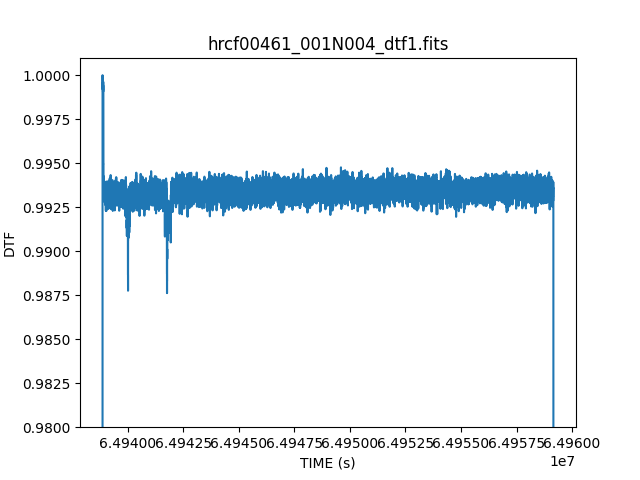

In [19]:
cat << EOM > c3.py
from pycrates import read_file
import matplotlib.pylab as plt

def make_figure(infile, xcol="time", ycol="dtf"):
    tab = read_file(infile)
    dt = tab.get_column(xcol)
    rate = tab.get_column(ycol)
    plt.plot(dt.values, rate.values, drawstyle="steps" )

    xlab = dt.name + ( " ({})".format(dt.unit) if len(dt.unit) else "" )
    ylab = rate.name + ( " ({})".format(rate.unit) if len(rate.unit) else "" )
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(infile)


make_figure( "hrcf00461_001N004_dtf1.fits")
plt.ylim(0.98, 1.001)
plt.savefig("chips_03.png")
EOM

python c3.py
display < chips_03.png

In [20]:
cat << EOM > hrc_src.reg 
# Region file format: CIAO version 1.0
circle(16476,16294,19.5)
EOM

In [21]:
pset dmextract infile="hrcf00461N005_evt2.fits[sky=region(hrc_src.reg)][bin time=64938947.367:64959159.548:1000]"
pset dmextract outfile=hrc_lc.fits
pset dmextract opt=ltc1
pset dmextract exp=hrcf00461_001N004_dtf1.fits
dmextract mode=h clob+

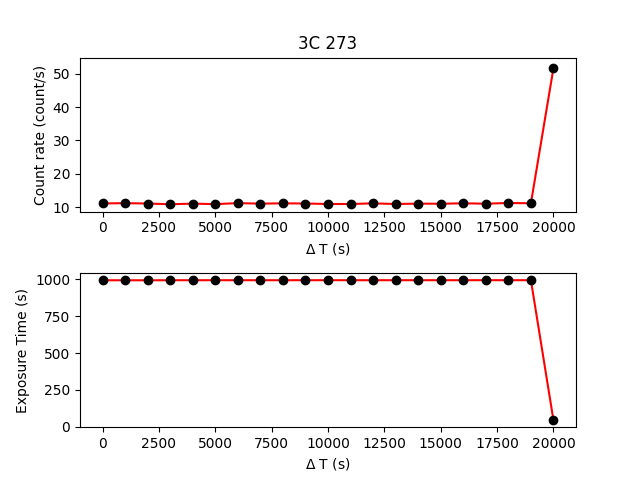

In [22]:
cat << EOM > c4.py

from pycrates import read_file
import matplotlib.pylab as plt


plt.subplots(2,1,sharex="col")
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
tab = read_file("hrc_lc.fits")
dt = tab.get_column("dt")
rate = tab.get_column("count_rate")
erate = tab.get_column("count_rate_err")
plt.errorbar(dt.values, rate.values, yerr=erate.values, 
    marker="o", color="red", mfc="black",mec="black", ecolor="grey")
plt.xlabel(r"$\Delta$ T (s)")
plt.ylabel("Count rate (count/s)")
plt.title("3C 273")

plt.subplot(2,1,2)
ee = tab.get_column("EXPOSURE")
plt.plot(dt.values, ee.values,
    marker="o", color="red", mfc="black",mec="black")
plt.xlabel(r"$\Delta$ T (s)")
plt.ylabel("Exposure Time (s)")

plt.savefig("chips_04.png")
EOM

python c4.py

display < chips_04.png

In [23]:
dmlist "hrc_lc.fits[cols time,count_rate]" data,clean

#  TIME                 COUNT_RATE
  64939447.3669999987        11.0712765358
  64940447.3669999987        11.1528259492
  64941447.3669999987         11.048326490
  64942447.3669999987        10.8289673489
  64943447.3669999987         11.017154770
  64944447.3669999987        10.8665958313
  64945447.3669999987        11.1680040638
  64946447.3669999987        11.0144558786
  64947447.3669999987        11.1022845676
  64948447.3669999987        11.0535377390
  64949447.3669999987        10.8982018838
  64950447.3669999987        10.9066908577
  64951447.3669999987        11.0929271784
  64952447.3669999987        10.9071404738
  64953447.3669999987        11.0133592381
  64954447.3669999987         10.980032030
  64955447.3669999987        11.1168633047
  64956447.3669999987        10.9903806380
  64957447.3669999987        11.2130489949
  64958447.3669999987        11.1239944266
  64959447.3669999987        51.7223085789


# Cleanup


In [24]:
/bin/rm -f pcadf322753908N002_asol1.fits hrcf00461N005_evt2.fits hrcf00461_001N004_dtf1.fits